In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
import datetime as dt

In [2]:
beer_reviews=pd.read_excel('beer_reviews_descodificato_UTF.xlsx', encoding='utf-8')
beer_reviews.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [3]:
beer_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
brewery_id            1048575 non-null int64
brewery_name          1048566 non-null object
review_time           1048575 non-null int64
review_overall        1048575 non-null float64
review_aroma          1048575 non-null float64
review_appearance     1048575 non-null float64
review_profilename    1048340 non-null object
beer_style            1048575 non-null object
review_palate         1048575 non-null float64
review_taste          1048575 non-null float64
beer_name             1048575 non-null object
beer_abv              1005757 non-null float64
beer_beerid           1048575 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 104.0+ MB


In [4]:
beer_reviews=beer_reviews.dropna()
beer_reviews = beer_reviews.sort_values("review_overall",ascending=False)
beer_reviews= beer_reviews.drop_duplicates(subset = ['review_profilename','beer_beerid'],keep='first')
beer_reviews= beer_reviews.drop_duplicates(subset = ['review_profilename','beer_name'],keep='first')
beer_reviews=beer_reviews.loc[(beer_reviews.review_overall>=1) & (beer_reviews.review_appearance>=1)]
beer_reviews=beer_reviews.drop(['beer_beerid','brewery_id'], axis=1)

In [5]:
beer_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992235 entries, 404634 to 343327
Data columns (total 11 columns):
brewery_name          992235 non-null object
review_time           992235 non-null int64
review_overall        992235 non-null float64
review_aroma          992235 non-null float64
review_appearance     992235 non-null float64
review_profilename    992235 non-null object
beer_style            992235 non-null object
review_palate         992235 non-null float64
review_taste          992235 non-null float64
beer_name             992235 non-null object
beer_abv              992235 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 90.8+ MB


In [6]:
beer_reviews.review_time=pd.to_datetime (beer_reviews.review_time,unit = 's')

In [7]:
beer_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992235 entries, 404634 to 343327
Data columns (total 11 columns):
brewery_name          992235 non-null object
review_time           992235 non-null datetime64[ns]
review_overall        992235 non-null float64
review_aroma          992235 non-null float64
review_appearance     992235 non-null float64
review_profilename    992235 non-null object
beer_style            992235 non-null object
review_palate         992235 non-null float64
review_taste          992235 non-null float64
beer_name             992235 non-null object
beer_abv              992235 non-null float64
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 90.8+ MB


In [8]:
beer_reviews.sort_values('review_time')

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv
286273,Boston Beer Company (Samuel Adams),1998-01-10 00:00:01,4.0,4.0,3.0,Todd,American Strong Ale,4.5,4.5,Samuel Adams Triple Bock,17.5
764128,Sprecher Brewing Company,1998-01-13 00:00:01,4.5,4.0,4.0,BeerAdvocate,Vienna Lager,4.0,4.0,Special Amber,5.0
78405,Sierra Nevada Brewing Co.,1998-02-06 00:00:01,4.5,4.0,4.0,BeerAdvocate,American Barleywine,4.0,4.5,Sierra Nevada Bigfoot Barleywine Style Ale,9.6
1037995,McNeill's Brewery,1998-02-14 00:00:01,4.0,3.5,3.5,Todd,American Amber / Red Ale,3.5,4.0,McNeill's Firehouse Amber Ale,5.6
921890,Upper Canada Brewing Company,1998-02-17 00:00:01,4.5,3.0,3.0,BeerAdvocate,American Pale Lager,4.0,4.5,Lager,5.0
...,...,...,...,...,...,...,...,...,...,...,...
428421,Oettinger Brauerei,2012-01-11 09:20:14,3.0,3.5,3.0,Everydayoff,German Pilsener,2.5,2.5,Oettinger Pils,4.7
562035,Boulevard Brewing Co.,2012-01-11 09:34:14,4.5,4.0,4.0,libbey,Quadrupel (Quad),4.5,4.5,The Sixth Glass,10.5
400524,Tröegs Brewing Company,2012-01-11 10:10:56,4.0,4.5,4.0,Lawl3ss,Oatmeal Stout,4.0,4.0,Tröegs Java Head Stout,7.5
551392,Flat Tail Brewing,2012-01-11 12:29:30,3.5,3.5,3.0,Rifugium,Kölsch,3.5,3.5,Tailgater,5.5


In [9]:
beer_reviews['Year']=beer_reviews['review_time'].apply(lambda x: x.year)
beer_reviews['month']=beer_reviews['review_time'].apply(lambda x: x.month)

beer_reviews.head()

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,Year,month
404634,Tröegs Brewing Company,2008-03-27 15:24:08,5.0,4.0,4.5,punisher31673,Oatmeal Stout,4.5,5.0,Scratch Beer 5 - 2007,9.9,2008,3
485478,Gardner Ale House,2007-04-18 01:18:00,5.0,4.0,4.0,bjohnson,Irish Dry Stout,4.0,4.0,Naked Stout,3.9,2007,4
579973,Firestone Walker Brewing Co.,2011-10-05 21:26:16,5.0,5.0,5.0,razorsdescent,American Double / Imperial IPA,5.0,5.0,Double Jack,9.5,2011,10
240095,Brouwerij Van Steenberge N.V.,2010-01-29 00:58:10,5.0,4.5,4.5,ryanonline,Belgian IPA,4.5,4.5,Piraat Ale,10.5,2010,1
779370,Surly Brewing Company,2011-02-19 23:55:05,5.0,5.0,4.5,siradmiralnelson,American Double / Imperial IPA,4.5,4.5,Abrasive Ale,9.0,2011,2


In [10]:
beer_reviews=beer_reviews.drop(['review_time'], axis=1)

In [11]:
beer_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992235 entries, 404634 to 343327
Data columns (total 12 columns):
brewery_name          992235 non-null object
review_overall        992235 non-null float64
review_aroma          992235 non-null float64
review_appearance     992235 non-null float64
review_profilename    992235 non-null object
beer_style            992235 non-null object
review_palate         992235 non-null float64
review_taste          992235 non-null float64
beer_name             992235 non-null object
beer_abv              992235 non-null float64
Year                  992235 non-null int64
month                 992235 non-null int64
dtypes: float64(6), int64(2), object(4)
memory usage: 98.4+ MB


In [12]:
Filtro=beer_reviews[(beer_reviews['Year']>2006 ) & (beer_reviews['review_overall']<=5.0)&(beer_reviews['review_palate']<=5.0)&(beer_reviews['review_taste']<=5.0)&(beer_reviews['review_aroma']<=5.0)&(beer_reviews['review_appearance']<=5.0)]

In [13]:

Filtro.sort_values('Year')

,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,Year,month
536849,The Shed Restaurant & Brewery,3.5,4.0,3.5,Brad007,Rye Beer,3.5,4.0,Rye IPA,7.0,2007,5
977217,Sly Fox Brewing Company,4.5,4.0,4.0,msubulldog25,Saison / Farmhouse Ale,5.0,4.5,Saison VOS,6.9,2007,4
943970,"Bell's Brewery, Inc.",3.5,3.5,4.5,khiasmus,American Pale Wheat Ale,3.0,3.0,Bell's Oberon Ale,5.8,2007,6
564380,Berkshire Brewing Company Inc.,3.5,3.5,3.5,CharlieMopps,Kölsch,3.5,3.0,Gold Spike Ale,4.2,2007,1
354955,Minneapolis Town Hall Brewery,3.5,4.0,3.5,aaronh,Scotch Ale / Wee Heavy,4.0,3.5,Hope & King Scotch Ale,6.0,2007,4
...,...,...,...,...,...,...,...,...,...,...,...,...
607984,Damm S. A.,4.0,3.0,3.5,Keithly,Witbier,4.0,4.0,Estrella Damm Inedit,4.8,2012,1
335034,Kern River Brewing Company,5.0,5.0,4.0,nlmartin,American Double / Imperial IPA,4.5,5.0,Citra DIPA,8.0,2012,1
560623,Boulevard Brewing Co.,4.0,4.0,4.5,deltatauhobbit,American Double / Imperial Stout,3.5,4.5,Dark Truth Stout,9.7,2012,1
443426,Birrificio Le Baladin,4.5,4.0,4.0,Knapp85,English Barleywine,4.5,5.0,Xyauyù Etichetta Argento (Silver),13.5,2012,1


In [14]:
Filtro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777514 entries, 404634 to 343327
Data columns (total 12 columns):
brewery_name          777514 non-null object
review_overall        777514 non-null float64
review_aroma          777514 non-null float64
review_appearance     777514 non-null float64
review_profilename    777514 non-null object
beer_style            777514 non-null object
review_palate         777514 non-null float64
review_taste          777514 non-null float64
beer_name             777514 non-null object
beer_abv              777514 non-null float64
Year                  777514 non-null int64
month                 777514 non-null int64
dtypes: float64(6), int64(2), object(4)
memory usage: 77.1+ MB


In [15]:
Filtro.to_csv('bienbeer.csv', index=False)

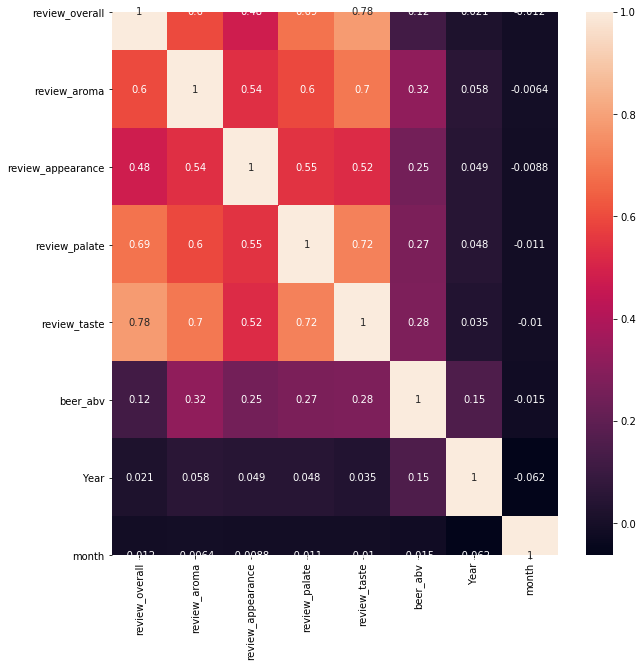

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(beer_reviews.corr(method='pearson'),annot=True)
plt.show()

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(Nberr.corr(method='pearson'),annot=True)
plt.show()

NameError: name 'Nberr' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:
beer_reviews.to_csv('pruebadomingo3.csv', index=False)

In [ ]:
x=Nberr['review_overall']
y=Nberr['review_overall']
z=Nberr['beer_abv']
plt.plot(x,y)
plt.plot(x,z)

In [18]:
reviews=Filtro[['review_overall','review_aroma','review_taste','review_appearance','review_palate','beer_abv']]
reviews

,review_overall,review_aroma,review_taste,review_appearance,review_palate,beer_abv
404634,5.0,4.0,5.0,4.5,4.5,9.90
485478,5.0,4.0,4.0,4.0,4.0,3.90
579973,5.0,5.0,5.0,5.0,5.0,9.50
240095,5.0,4.5,4.5,4.5,4.5,10.50
779370,5.0,5.0,4.5,4.5,4.5,9.00
...,...,...,...,...,...,...
341593,1.0,1.0,1.0,2.0,1.0,11.30
341986,1.0,2.0,1.5,2.0,3.0,11.30
925047,1.0,2.0,1.5,2.5,3.0,4.10
343259,1.0,2.0,1.0,4.0,3.0,5.24


(6.0, 0.0)

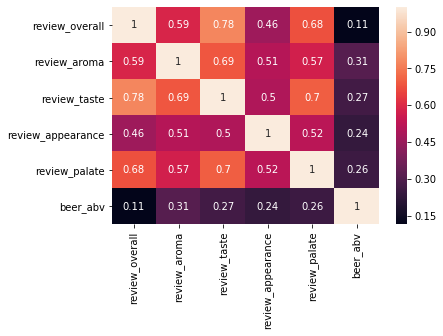

In [19]:

df_corr = reviews.corr()
ax = sns.heatmap(df_corr, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)



In [ ]:
# Create the correlation matrix
df=reviews
corr = df.corr()

# Generate a mask for the upper triangle; True = do NOT show
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# More details at https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(
    corr,          # The data to plot
    mask=mask,     # Mask some cells
  #  cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=.3,       # The maximum value of the legend. All higher vals will be same color
    vmin=-.3,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5}  # Extra kwargs for the legend; in this case, shrink by 50%
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# You can save this as a png with
# f.savefig('heatmap_colored_correlation_matrix_seaborn_python.png')

In [ ]:
sns.set()
plt.figure(figsize=(10,10))
sns.heatmap(reviews.corr(method='pearson'),annot=True)
plt.show()

In [ ]:
corr = reviews.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5})

In [ ]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'city-mpg', 'price'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.2)

g = sns.JointGrid(data=Filtro, x='Height', y='Weight', xlim=(140, 190), ylim=(40, 100), height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(145, 95, 'r = 0.45, p < .001', fontstyle='italic')
plt.tight_layout()